        Date        Open        High         Low       Close  Volume
0 2024-01-01  351.949281  483.615782  462.037159  395.720642   16115
1 2024-01-02  346.182519  275.020934  487.727355  464.805495   28933
2 2024-01-03  354.081553  247.607139  354.354190  312.066656    4320
3 2024-01-04  499.563617  408.710096  279.817282  446.952441   41380
4 2024-01-05  410.160460  198.047225  266.921714  395.556332   41334


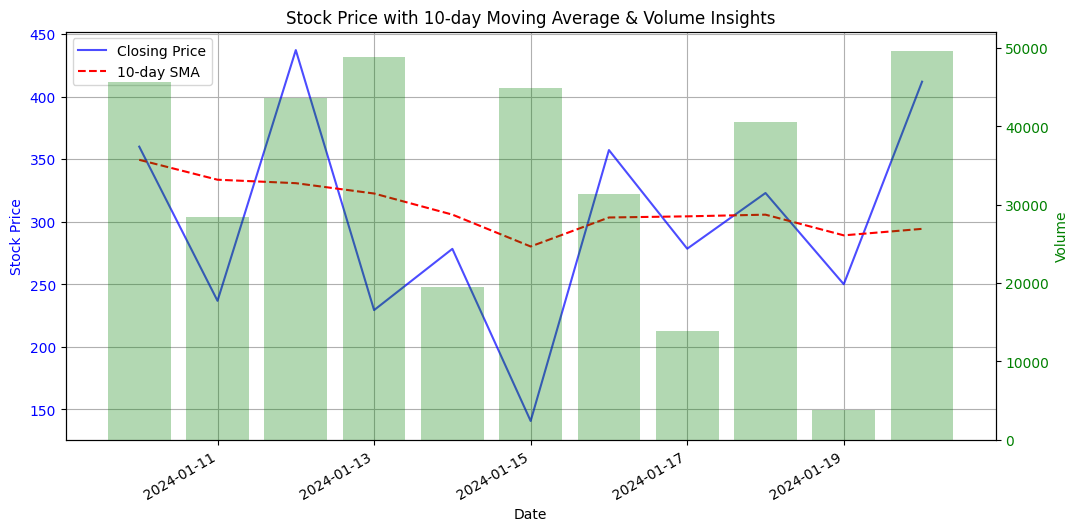

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/stock_data.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Display first few rows
print(df.head())

# Moving Average Calculation 📈
df['SMA_10'] = df['Close'].rolling(window=10).mean()

# Filter dataset to avoid NaN values at start
df_valid = df.dropna()

# Create figure with two subplots
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot Closing Price & 10-day SMA on primary axis
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price", color='blue')
ax1.plot(df_valid['Date'], df_valid['Close'], label="Closing Price", color='blue', alpha=0.7)
ax1.plot(df_valid['Date'], df_valid['SMA_10'], label="10-day SMA", color='red', linestyle="dashed")
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc="upper left")
ax1.grid(True)

# Create secondary axis for Volume
ax2 = ax1.twinx()
ax2.set_ylabel("Volume", color='green')
ax2.bar(df_valid['Date'], df_valid['Volume'], color='green', alpha=0.3, label="Volume")
ax2.tick_params(axis='y', labelcolor='green')

# Title & show plot
plt.title("Stock Price with 10-day Moving Average & Volume Insights")
fig.autofmt_xdate()  # Rotate date labels
plt.show()
